# Explaining Machine Learning Models

- Office Hours for 022221FT
- 05/19/21

## Overview

- Fit an SVC and RandomForest model on our new data set. 
- Discuss 3 different methods for interpreting the models' results and what features it used to make its predictions. 
    - Permutation Importance
    - Using `SHAP` and Shapely Values
    - Using `LIME`

## Questions

- [Google Doc](https://docs.google.com/document/d/1TFMucUZQPhGX6eGvhUpSlrByKHswgC30SUfybcuu6Hw/edit#)

## Notebook Headers for Study Group

- ⭐️**EXPLAINING MACHINE LEARNING MODELS**⭐️
    - All of today's content.
-  📚**Shap Resources**
    - Collection of Videos, Book Excerpts, and Blogs.

___

# Predicing Drug Use

## Goal

- To predict if someone is a heroin user and to use the model to gain insights into risk factors for using heroin. 

## Data

- Drug Consumption Survey: 
    - http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

- Data Set contains information about previous drug use for many classes of drugs, demographic data such as education, age, country, and personality scores for several metrics.
    - Nscore
    - Escore	
    - Oscore	
    - Ascore	
    - Cscore	
    - Impulsiveness	
    - SS

>- This dataset has already been heavily pre-processed to restore the orignal values of the dataset before the dataset providers encoded features. 
    - See `reference`>`Feature Selection - data-renaming.ipynb`" [GitHub notebook Link](https://github.com/jirvingphd/dsc-phase-3-project/blob/9258a878234c98d13a48204131fa09eb9171f445/reference/Feature%20Selection%20-%20data-renaming.ipynb)

### Imports and Functions

In [1]:
%load_ext autoreload
%autoreload 2

import project_functions as pf

In [2]:
## Import pd, sns, plt, np
from project_functions.imports import *

In [3]:
## Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE,SMOTENC


## Models & Utils
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from time import time

In [4]:
# ## Changing Pandas Options to see full columns in previews and info
n=200
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
# pd.set_option('display.float_format',lambda x: f"{x:.2f}")

### Modeling Functionx (WIP)_

## Preprocessing

In [5]:
df = pd.read_csv('data/drug_use_renamed_converted.csv')
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,FakeDrugSemeron,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,42.0,-0.21712,-1.18084,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25-34,Male,Doctorate degree,UK,White,29.0,52.0,55.0,48.0,41.0,-0.71126,-0.21575,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31.0,45.0,40.0,32.0,34.0,-1.37983,0.40148,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters degree,UK,White,34.0,34.0,46.0,47.0,46.0,-1.37983,-1.18084,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35-44,Female,Doctorate degree,UK,White,43.0,28.0,43.0,41.0,50.0,-0.21712,-0.21575,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18-24,Female,"Some college or university, no certificate or ...",USA,White,25.0,51.0,57.0,48.0,33.0,0.88113,1.92173,Used in Last Week,Never Used,Never Used,Never Used,Used in Last Month,Used in Last Week,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Year,Used in Last Year,Never Used,Never Used,Never Used,Never Used,Used in Last Week
1881,1885,18-24,Male,"Some college or university, no certificate or ...",USA,White,33.0,51.0,50.0,48.0,30.0,0.88113,0.76540,Used in Last Week,Never Used,Never Used,Never Used,Used in Last Week,Used in Last Year,Used in Last Month,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Month,Used in Last Month,Used in Last Week,Never Used,Never Used
1882,1886,25-34,Female,University degree,USA,White,47.0,30.0,37.0,31.0,31.0,0.52975,-0.52593,Used in Last Month,Used in Last Day,Used in Last Week,Used in Last Week,Used in Last Day,Used in Last Day,Used in Last Day,Used in Last Month,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Never Used
1883,1887,18-24,Female,"Some college or university, no certificate or ...",USA,White,45.0,26.0,48.0,32.0,22.0,1.29221,1.22470,Used in Last Week,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Day,Used in Last Week,Never Used,Never Used,Used in Last Year,Never Used,Never Used,Used in Last Year,Used in Last Year,Never Used,Used in Last Year,Used in Last Month,Never Used,Never Used


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   Age              object 
 2   Gender           object 
 3   Education        object 
 4   Country          object 
 5   Ethnicity        object 
 6   Nscore           float64
 7   Escore           float64
 8   Oscore           float64
 9   Ascore           float64
 10  Cscore           float64
 11  Impulsiveness    float64
 12  SS               float64
 13  Alcohol          object 
 14  Amphet           object 
 15  Amyl             object 
 16  Benzos           object 
 17  Caff             object 
 18  Cannabis         object 
 19  Choc             object 
 20  Coke             object 
 21  Crack            object 
 22  Ecstasy          object 
 23  Heroin           object 
 24  Ketamine         object 
 25  LegalH           object 
 26  LSD              object 
 27  Meth             o

In [7]:
columns= {0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',
         6:'Nscore',7:'Escore',8:'Oscore',9:"Ascore",10:'Cscore',
         11:'Impulsiveness',12:'SS'}

drug_dict = {13:'Alcohol', 
              14: 'Amphet', 
              15: 'Amyl', 
              16: 'Benzos', 
              17: 'Caff', 
              18: 'Cannabis', 
              19: 'Choc', 
              20: 'Coke',
              21: 'Crack', 
              22: 'Ecstasy',
              23: 'Heroin', 
              24: 'Ketamine', 
              25: 'LegalH', 
              26: 'LSD',
              27: 'Meth',
              28: 'Mushrooms', 
              29: 'Nicotine', 
              30: "FakeDrugSemeron",
              31: 'VSA'}

all_columns = {**columns, **drug_dict}

drug_cols = list(drug_dict.values())
drug_cols

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'FakeDrugSemeron',
 'VSA']

### Identifying Columns for Preprocessing

In [8]:
object_cols = list(df.drop(columns=drug_cols).select_dtypes('object').columns)
object_cols

['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

In [9]:
## Column Lists
ordinal_cols = ['Age','Education']
onehot_cols = ['Gender','Country', 'Ethnicity']

In [10]:
df.select_dtypes('object').drop(columns=[*drug_cols,*ordinal_cols,*onehot_cols])

""
0
1
2
3
4
...
1880
1881
1882
1883


## Feature Engineering

### How to treat drug cols?

- Either encode as ordinal or bin into 3 bins ('never used','previous user','current user')

In [11]:
df['Heroin'].value_counts()

Never Used                1605
Used in Last Decade         94
Used over a Decade Ago      68
Used in Last Year           65
Used in Last Month          24
Used in Last Week           16
Used in Last Day            13
Name: Heroin, dtype: int64

In [12]:
df['Heroin'].unique()

array(['Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
       'Used in Last Year', 'Used in Last Week', 'Used in Last Day',
       'Used in Last Month'], dtype=object)

## Making New df for processing

In [13]:
df2 = df.copy()

### Binning Drug Use

In [14]:
druguse_cat_map = {'Never Used':'Non-User' , 
 'Used over a Decade Ago': 'Non-User',
 'Used in Last Decade':"User" ,
 'Used in Last Year': "User",
 'Used in Last Week': "User", 
 'Used in Last Day': "User",
 'Used in Last Month':"User"}
druguse_cat_map

{'Never Used': 'Non-User',
 'Used over a Decade Ago': 'Non-User',
 'Used in Last Decade': 'User',
 'Used in Last Year': 'User',
 'Used in Last Week': 'User',
 'Used in Last Day': 'User',
 'Used in Last Month': 'User'}

In [15]:
for col in drug_cols:
    df2[col] = df[col].replace(druguse_cat_map)
#     display(df2[col].value_counts(normalize=True, dropna=False))

In [16]:
df2['Heroin'].value_counts(1)

Non-User    0.887533
User        0.112467
Name: Heroin, dtype: float64

### Encoding Categorical Features (Ordinal)

In [17]:
ordinal_cols

['Age', 'Education']

### Age

In [18]:
## Making age map
age_map = {'18-24': 20,
           '25-34':30,
           '35-44':40, 
           '45-54':50,
           '55-64':60,
           '65+':70}

In [19]:
df2['Age'] = df['Age'].replace(age_map)#.value_counts(dropna=False)
df2['Age'].value_counts(dropna=False)

20    643
30    481
40    356
50    294
60     93
70     18
Name: Age, dtype: int64

### Education

In [20]:
df['Education'].value_counts(dropna=False)

Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       270
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: Education, dtype: int64

In [21]:
education_map = {"Left school before 16 years":0, 
                 "Left school at 16 years":1, 
                 "Left school at 17 years":2,
                 "Left school at 18 years":3,
                 "Some college or university, no certificate or degree":4,
                 "Professional certificate/ diploma":5,
                 "University degree":6, "Masters degree":7, "Doctorate degree":8}

df2["Education"] = df['Education'].replace(education_map)
df2['Education'].value_counts(dropna=False)

4    506
6    480
7    283
5    270
3    100
1     99
8     89
2     30
0     28
Name: Education, dtype: int64

In [22]:
df2

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,FakeDrugSemeron,VSA
0,1,40,Female,5,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,42.0,-0.21712,-1.18084,User,User,Non-User,User,User,Non-User,User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,User,Non-User,Non-User
1,2,30,Male,8,UK,White,29.0,52.0,55.0,48.0,41.0,-0.71126,-0.21575,User,User,User,Non-User,User,User,User,User,Non-User,User,Non-User,User,Non-User,User,User,Non-User,User,Non-User,Non-User
2,3,40,Male,5,UK,White,31.0,45.0,40.0,32.0,34.0,-1.37983,0.40148,User,Non-User,Non-User,Non-User,User,User,User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User
3,4,20,Female,7,UK,White,34.0,34.0,46.0,47.0,46.0,-1.37983,-1.18084,User,Non-User,Non-User,User,User,User,User,User,Non-User,Non-User,Non-User,User,Non-User,Non-User,Non-User,Non-User,User,Non-User,Non-User
4,5,40,Female,8,UK,White,43.0,28.0,43.0,41.0,50.0,-0.21712,-0.21575,User,Non-User,Non-User,Non-User,User,User,User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,User,User,Non-User,Non-User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,20,Female,4,USA,White,25.0,51.0,57.0,48.0,33.0,0.88113,1.92173,User,Non-User,Non-User,Non-User,User,User,User,Non-User,Non-User,Non-User,Non-User,Non-User,User,User,Non-User,Non-User,Non-User,Non-User,User
1881,1885,20,Male,4,USA,White,33.0,51.0,50.0,48.0,30.0,0.88113,0.76540,User,Non-User,Non-User,Non-User,User,User,User,Non-User,Non-User,User,Non-User,Non-User,User,User,User,User,User,Non-User,Non-User
1882,1886,30,Female,6,USA,White,47.0,30.0,37.0,31.0,31.0,0.52975,-0.52593,User,User,User,User,User,User,User,User,Non-User,User,Non-User,User,Non-User,User,Non-User,User,User,Non-User,Non-User
1883,1887,20,Female,4,USA,White,45.0,26.0,48.0,32.0,22.0,1.29221,1.22470,User,Non-User,Non-User,Non-User,User,User,User,Non-User,Non-User,User,Non-User,Non-User,User,User,Non-User,User,User,Non-User,Non-User


# Preprocessing

In [23]:
## Specifying root names of types of features to loop through and filter out from df
target_col = 'Heroin'
drop_cols = ['ID']
target_map = {'Non-User':0, 'User':1}

y = df2[target_col].map(target_map).copy()
X = df2.drop(columns=[target_col,*drop_cols]).copy()
y.value_counts(1,dropna=False)

0    0.887533
1    0.112467
Name: Heroin, dtype: float64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,FakeDrugSemeron,VSA
454,40,Male,6,UK,White,51.0,37.0,48.0,28.0,37.0,0.88113,0.40148,User,User,Non-User,User,User,User,User,User,Non-User,User,User,User,User,Non-User,User,User,Non-User,Non-User
1365,20,Female,4,USA,White,50.0,44.0,53.0,33.0,33.0,0.88113,0.76540,User,User,Non-User,User,User,User,User,Non-User,Non-User,User,Non-User,User,User,User,Non-User,User,Non-User,User
1503,50,Female,8,UK,White,36.0,50.0,53.0,47.0,54.0,-0.21712,-0.52593,User,Non-User,Non-User,Non-User,User,Non-User,User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,User,Non-User,Non-User
446,20,Female,4,UK,White,47.0,49.0,53.0,31.0,35.0,1.29221,1.22470,User,Non-User,User,User,User,User,User,Non-User,Non-User,User,Non-User,User,User,Non-User,User,User,Non-User,Non-User
1112,20,Male,4,USA,White,12.0,43.0,46.0,51.0,54.0,-0.21712,0.76540,User,Non-User,Non-User,Non-User,User,User,User,Non-User,Non-User,Non-User,Non-User,User,User,User,User,User,Non-User,Non-User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,20,Male,4,USA,White,31.0,39.0,50.0,54.0,38.0,-0.71126,-0.84637,User,User,Non-User,User,User,User,User,Non-User,Non-User,User,Non-User,User,User,User,User,User,Non-User,User
135,40,Female,1,UK,White,21.0,50.0,42.0,54.0,52.0,0.52975,-0.52593,Non-User,Non-User,Non-User,Non-User,User,Non-User,User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User,Non-User
1524,20,Male,4,USA,White,45.0,40.0,53.0,35.0,30.0,1.29221,0.40148,User,User,Non-User,User,User,User,User,Non-User,Non-User,Non-User,Non-User,User,User,User,User,User,Non-User,User
1133,20,Male,3,USA,White,49.0,44.0,44.0,34.0,29.0,1.29221,1.22470,User,User,Non-User,User,User,User,User,User,User,User,User,User,User,User,User,User,Non-User,User


In [25]:
from sklearn import set_config
set_config(display='diagram')

In [26]:
## saving list of numeric vs categorical feature
num_cols = list(X_train.select_dtypes('number').columns)
cat_cols = list(X_train.select_dtypes('object').columns)

## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,drop='first'))
])

print('# of num_cols:',len(num_cols))
print('# of cat_cols:',len(cat_cols))

# of num_cols: 9
# of cat_cols: 21


In [27]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', MinMaxScaler())]),
                                 ['Age', 'Education', 'Nscore', 'Escore',
                                  'Oscore', 'Ascore', 'Cscore', 'Impulsiveness',
                                  'SS']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['Gender', 'Country', 'Ethnicity', 'Alcohol',
                                  'Amphet', 'Amyl', 'Benzos', 'Caff',
                                  'Cannabis', 'Choc', 'Coke', 'Crack',
                                  'Ecstasy', 'Ketamine', 'LegalH', 'LSD',
                                  'Meth', 'Mushrooms', 'Nicotine',
                                  'FakeDrugSemeron', 'VSA'])])

In [28]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

## Use the encoder's .get_feature_names
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features

In [29]:
## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)

## Tranform X_train and X_test and make into DataFrames
X_train_df

,Age,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS,Gender_Male,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White,Alcohol_User,Amphet_User,Amyl_User,Benzos_User,Caff_User,Cannabis_User,Choc_User,Coke_User,Crack_User,Ecstasy_User,Ketamine_User,LegalH_User,LSD_User,Meth_User,Mushrooms_User,Nicotine_User,FakeDrugSemeron_User,VSA_User
454,0.4,0.750,0.812500,0.488372,0.666667,0.333333,0.476190,0.629735,0.619957,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1365,0.0,0.500,0.791667,0.651163,0.805556,0.437500,0.380952,0.629735,0.710933,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1503,0.6,1.000,0.500000,0.790698,0.805556,0.729167,0.880952,0.428474,0.388117,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
446,0.0,0.500,0.729167,0.767442,0.805556,0.395833,0.428571,0.705068,0.825752,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1112,0.0,0.500,0.000000,0.627907,0.611111,0.812500,0.880952,0.428474,0.710933,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0.0,0.500,0.395833,0.534884,0.722222,0.875000,0.500000,0.337920,0.308011,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
135,0.4,0.125,0.187500,0.790698,0.500000,0.875000,0.833333,0.565343,0.388117,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1524,0.0,0.500,0.687500,0.558140,0.805556,0.479167,0.309524,0.705068,0.619957,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1133,0.0,0.375,0.770833,0.651163,0.555556,0.458333,0.285714,0.705068,0.825752,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [30]:
y.value_counts(1)

0    0.887533
1    0.112467
Name: Heroin, dtype: float64

## Resampling with SMOTENC

In [31]:
y_train.value_counts(1)

0    0.892427
1    0.107573
Name: Heroin, dtype: float64

In [32]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# smote_feats

In [33]:
## resample training data
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_resample(X_train_df,y_train)
y_train_sm.value_counts()

1    1261
0    1261
Name: Heroin, dtype: int64

# MODELING

#### Setting `train_test_list`

In [34]:
### SAVING XY DATA TO LIST TO UNPACK
train_test_list = [X_train_sm,y_train_sm,X_test_df,y_test]

## Linear SVC

[i] Training started at 05/19/21-17:34:07:
	Training time was 0.0628 seconds.

           Train  Test  Difference
accuracy   0.94  0.93        0.01 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       412
           1       0.72      0.80      0.76        60

    accuracy                           0.93       472
   macro avg       0.84      0.88      0.86       472
weighted avg       0.94      0.93      0.94       472



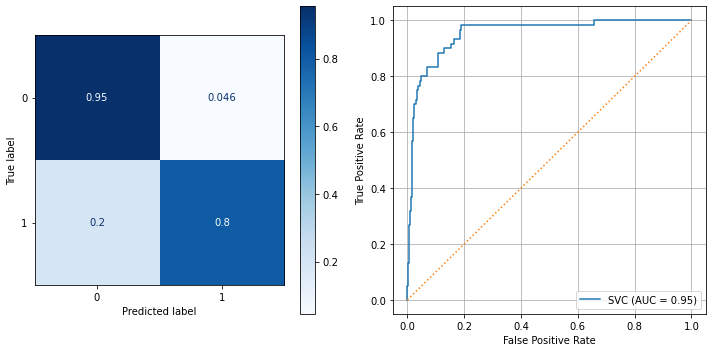

SVC(C=1, kernel='linear')

In [35]:
svc_linear = SVC(kernel='linear',C=1)
pf.fit_and_time_model(svc_linear,*train_test_list)

## RandomForest

[i] Training started at 05/19/21-17:34:07:
	Training time was 0.3066 seconds.

           Train  Test  Difference
accuracy    1.0  0.94        0.06 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       412
           1       0.79      0.70      0.74        60

    accuracy                           0.94       472
   macro avg       0.87      0.84      0.85       472
weighted avg       0.94      0.94      0.94       472



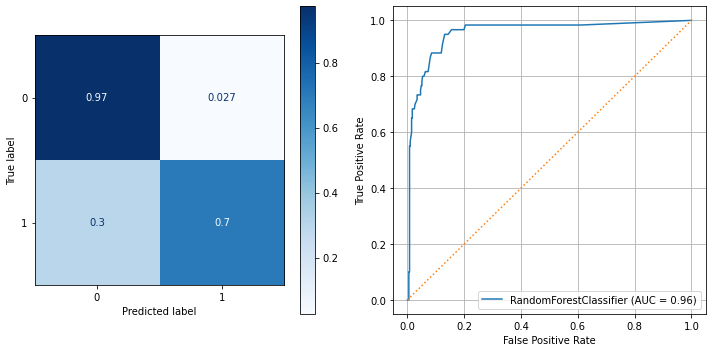

RandomForestClassifier()

In [36]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

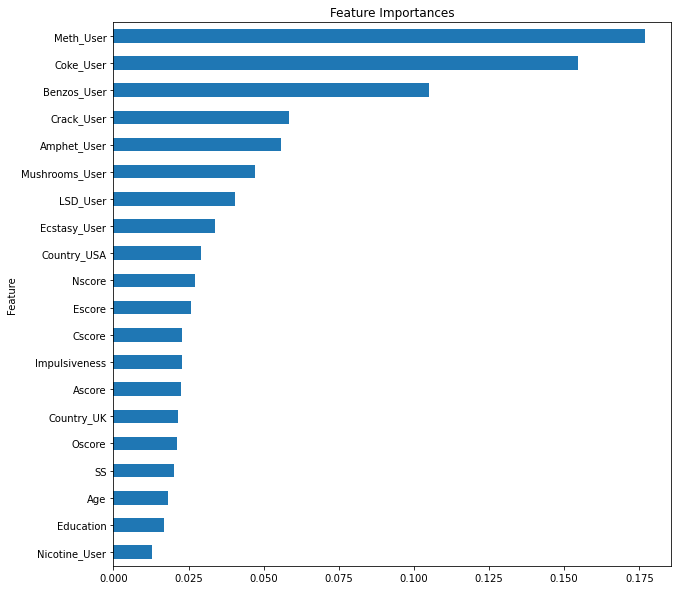

In [37]:
pf.get_importance(rf,X_test_df);

# ⭐️**EXPLAINING MACHINE LEARNING MODELS**⭐️

## Overview

- We will discuss/demo 3 methods of interpreting machine learning models. 
    1. Using Permutation Importance (from scikit-learn)
    2. Using `SHAP` model explainers
    3. Using `LIME` instance explainers

## Permutation Importance

> Permutation Importances will iteratively shuffle the rows of a single feature at a time to asses the model's change in performance with that feature's relationship with the target disrupted. 
- https://scikit-learn.org/stable/modules/permutation_importance.html

```python
from sklearn.inspection import permutation_importance
r = permutation_importance(svc_linear, X_test_df, y_test, n_repeats=30)
r.keys()
```
- Interesting Observation: 
    - permutation_importance takes a `scoring` argument!

> "**Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model.** Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model."

In [38]:
from sklearn.inspection import permutation_importance

In [39]:
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(svc_linear, X_test_df, y_test,
                           n_repeats=30,scoring='f1')
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [40]:
r['importances_mean']

array([ 1.78162079e-02,  0.00000000e+00,  1.66955354e-02,  3.93700787e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.27113227e-02,
        1.11504641e-02,  2.97505196e-03,  5.74928134e-04,  0.00000000e+00,
        2.05961669e-02,  3.92717577e-04,  2.26296169e-02,  4.38583510e-03,
        2.15925044e-03,  0.00000000e+00, -9.35358341e-03,  0.00000000e+00,
        1.29563805e-03,  2.29767946e-03,  1.96850394e-04,  1.49673427e-02,
        8.42183971e-03,  1.68893784e-01,  1.64163486e-03,  3.06002665e-02,
       -5.39932508e-03,  3.00190829e-01, -6.03633404e-03,  1.11141474e-02,
       -1.41232346e-03,  1.57177732e-02,  1.96448156e-02,  1.21472871e-01,
        4.10194767e-03,  7.69360495e-03, -3.99950006e-04,  0.00000000e+00])

In [41]:
## can make the mean importances into a series
svc_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'svc permutation importance')
svc_importances

Age                            0.017816
Education                      0.000000
Nscore                         0.016696
Escore                         0.000394
Oscore                         0.000000
Ascore                         0.000000
Cscore                         0.000000
Impulsiveness                  0.022711
SS                             0.011150
Gender_Male                    0.002975
Country_Canada                 0.000575
Country_New Zealand            0.000000
Country_Other                  0.020596
Country_Republic of Ireland    0.000393
Country_UK                     0.022630
Country_USA                    0.004386
Ethnicity_Black                0.002159
Ethnicity_Mixed-Black/Asian    0.000000
Ethnicity_Mixed-White/Asian   -0.009354
Ethnicity_Mixed-White/Black    0.000000
Ethnicity_Other                0.001296
Ethnicity_White                0.002298
Alcohol_User                   0.000197
Amphet_User                    0.014967
Amyl_User                      0.008422


In [42]:
r = permutation_importance(rf, X_test_df, y_test, n_repeats=30, scoring='f1')
rf_importances = pd.Series(r['importances_mean'],index=X_test_df.columns,
                          name= 'rf permutation importance')
rf_importances

Age                           -0.005188
Education                      0.013599
Nscore                         0.011425
Escore                         0.004862
Oscore                        -0.018860
Ascore                        -0.000375
Cscore                        -0.007950
Impulsiveness                 -0.001953
SS                             0.004063
Gender_Male                   -0.000669
Country_Canada                 0.001733
Country_New Zealand            0.000000
Country_Other                 -0.011101
Country_Republic of Ireland    0.000000
Country_UK                     0.014184
Country_USA                    0.020597
Ethnicity_Black                0.000000
Ethnicity_Mixed-Black/Asian    0.000000
Ethnicity_Mixed-White/Asian    0.000000
Ethnicity_Mixed-White/Black    0.000000
Ethnicity_Other                0.000000
Ethnicity_White                0.005426
Alcohol_User                   0.000217
Amphet_User                    0.115595
Amyl_User                      0.008370


In [43]:
embedded_importances = pf.get_importance(rf,X_test_df,plot=False)
embedded_importances.name ='rf.feature_importances_'
embedded_importances

Age                            0.018062
Education                      0.016942
Nscore                         0.027116
Escore                         0.025836
Oscore                         0.021263
Ascore                         0.022441
Cscore                         0.022872
Impulsiveness                  0.022695
SS                             0.019994
Gender_Male                    0.012868
Country_Canada                 0.002418
Country_New Zealand            0.000111
Country_Other                  0.003511
Country_Republic of Ireland    0.000579
Country_UK                     0.021467
Country_USA                    0.029056
Ethnicity_Black                0.000157
Ethnicity_Mixed-Black/Asian    0.000105
Ethnicity_Mixed-White/Asian    0.000095
Ethnicity_Mixed-White/Black    0.000314
Ethnicity_Other                0.001605
Ethnicity_White                0.002571
Alcohol_User                   0.001097
Amphet_User                    0.055802
Amyl_User                      0.005402


In [44]:
def compare_importances(*importances,sort_index=True,sort_col=0,show_bar=False):
    """Accepts Series of feature importances to concat.
    
    Args:
        *importances (Seires): seires to concat (recommended to pre-set names of Series)
        sort_index (bool, default=True): return series sorted by index. 
                            If False, sort seires by sort_col  #
        sort_col (int, default=0): If sort_index=False, sort df by this column #
        show_bar (bool, default=False): If show_bar, returns a pandas styler instead of df
                                        with the importances plotted as bar graphs
        
    Returns:
        DataFrame: featutre importances     
    
        """
    ## Concat Importances
    compare_importances = pd.concat(importances,axis=1)
    
    ## Sort DF by index or by sort_col
    if sort_index:
        sort_col_name = 'Index'
        compare_importances = compare_importances.sort_index()
    else:
        sort_col_name = compare_importances.columns[sort_col]
        compare_importances= compare_importances.sort_values(sort_col_name,ascending=False)
        
    ## If show bar, return pandas styler with in-cell bargraphs
    if show_bar:
        return compare_importances.style.bar().set_caption(f'Feature Importances - sorted by {sort_col_name}')
    else:
        return compare_importances

In [45]:
## Compare embedded feature importance vs permutation importance
comp = pf.compare_importances(embedded_importances,rf_importances,#svc_importances,
                          show_bar=True,sort_index=False,sort_col=0)
comp

,rf.feature_importances_,rf permutation importance
Meth_User,0.176839,0.235192
Coke_User,0.154647,0.354801
Benzos_User,0.104851,0.353731
Crack_User,0.058389,0.060712
Amphet_User,0.055802,0.115595
Mushrooms_User,0.047163,0.063591
LSD_User,0.040509,0.022449
Ecstasy_User,0.033802,0.013511
Country_USA,0.029056,0.020597
Nscore,0.027116,0.011425


In [46]:
## Compare embedded feature importance vs permutation importance
comp = compare_importances(embedded_importances,rf_importances,svc_importances,
                          show_bar=True,sort_col=-1,sort_index=False)
comp

,rf.feature_importances_,rf permutation importance,svc permutation importance
Coke_User,0.154647,0.354801,0.300191
Benzos_User,0.104851,0.353731,0.168894
Meth_User,0.176839,0.235192,0.121473
Cannabis_User,0.007621,0.000000,0.030600
Impulsiveness,0.022695,-0.001953,0.022711
Country_UK,0.021467,0.014184,0.022630
Country_Other,0.003511,-0.011101,0.020596
LSD_User,0.040509,0.022449,0.019645
Age,0.018062,-0.005188,0.017816
Nscore,0.027116,0.011425,0.016696


## Using SHAP and Shapely Values for Model Interpretation

###  📚**Shap Resources**

>- SHAP (SHapley Additive exPlanations)) 
    - [Repository](https://github.com/slundberg/shap)
    - [Documentation](https://shap.readthedocs.io/en/latest/?badge=latest)
        - Install via pip or conda.
  

- SHAP uses game theory to calcualte Shapely values for each feature in the dataset. 
- Shapely values are calculated by iteratively testing each feature's contribution to the model by comparing the model's  performance with vs. without the feature. (The "marginal contribution" of the feature to the model's performance).



#### Papers, Book Excerpts, and  Blogs
- [White Paper on Shapely Values](https://arxiv.org/abs/1705.07874)
    
- [Intepretable Machine Learning Book - Section on SHAP](https://christophm.github.io/interpretable-ml-book/shap.html)
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





#### Videos/Talks:
- Explaining Machine Learning Models (in general).
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
- Understanding Shapely/SHAP Values:
    - [AI Simplified: SHAP Values in Machine Learning ](https://youtu.be/Tg8aPwPPJ9c)- (Intuitive Explanation)
    - [Explainable AI explained! | #4 SHAP  ](https://youtu.be/9haIOplEIGM)- (Math Calculation Explanation)


### How to Use SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        


- Import and initialize javascript:

```python
import shap 
shap.initjs()
```

In [47]:
import shap 
print(shap.__version__)
shap.initjs()

0.37.0


[i] Training started at 05/19/21-17:34:39:
	Training time was 0.3152 seconds.

           Train  Test  Difference
accuracy    1.0  0.94        0.06 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       412
           1       0.80      0.72      0.75        60

    accuracy                           0.94       472
   macro avg       0.88      0.84      0.86       472
weighted avg       0.94      0.94      0.94       472



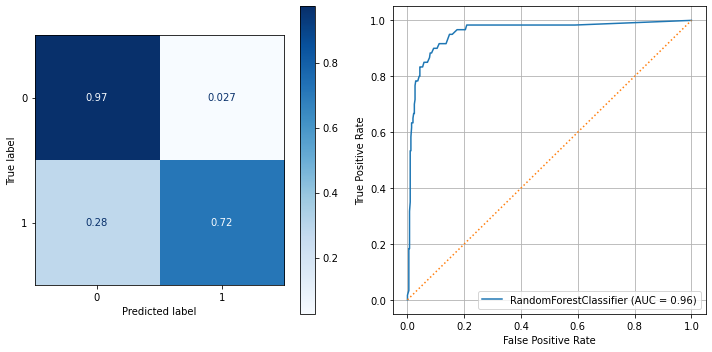

RandomForestClassifier()

In [48]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

### To Get Expanations for Trees:



1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data
    
  

In [49]:
# importances = pf.get_importance(rf,X_train_df,top_n=30)

In [50]:
## Initialize an explainer with the model
explainer = shap.TreeExplainer(rf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_df,y_test)
len(shap_values)

2

In [51]:
shap_values[1].shape, X_test_df.shape

((472, 40), (472, 40))

### Summary Plot

```python
## For normal bar graph of importance:
shap.summary_plot(shap_values[1],X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```
  

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


>- **IMPORTANT NOTE:** You may need to slice out the correct shap_values for the target class. (by default explainer.shap_values seems to return a list for a binary classification, one set of shap values for each class).
    - This will cause issues like the summary plot having a bar with an equal amount of blue and red for each class. 
    - To fix, slice out the correct matrix from shap_values [0,1]


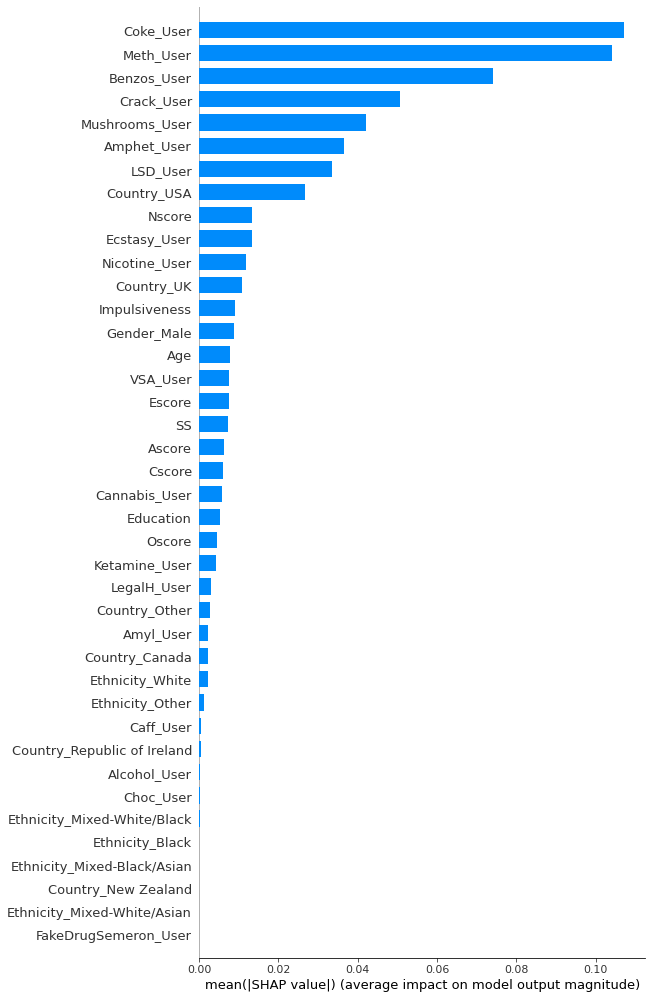

In [52]:
shap.summary_plot(shap_values[1], X_test_df,plot_type='bar',max_display=40)

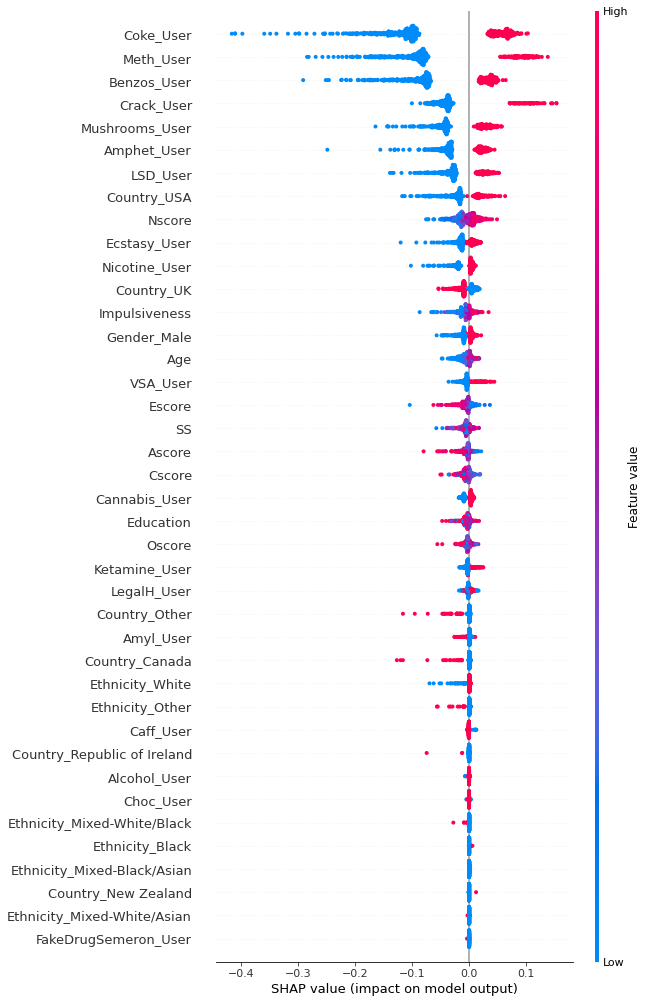

In [53]:
shap.summary_plot(shap_values[1],X_test_df,max_display=40)

### Force Plots

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row
row = np.random.choice(range(len(X_train)))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

#### Explain Individual Plot

In [54]:
target_lookup = {0:'Non-User',1:'Heroin User'}
target_lookup[0]

'Non-User'

In [55]:
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")
X_test_df.iloc[row].round(2)

- Row #: 399
Class = Heroin User


Age                            0.20
Education                      0.00
Nscore                         0.44
Escore                         0.65
Oscore                         0.47
Ascore                         0.52
Cscore                         0.64
Impulsiveness                  0.71
SS                             0.47
Gender_Male                    0.00
Country_Canada                 0.00
Country_New Zealand            0.00
Country_Other                  0.00
Country_Republic of Ireland    0.00
Country_UK                     0.00
Country_USA                    1.00
Ethnicity_Black                0.00
Ethnicity_Mixed-Black/Asian    0.00
Ethnicity_Mixed-White/Asian    0.00
Ethnicity_Mixed-White/Black    0.00
Ethnicity_Other                0.00
Ethnicity_White                1.00
Alcohol_User                   1.00
Amphet_User                    1.00
Amyl_User                      0.00
Benzos_User                    1.00
Caff_User                      1.00
Cannabis_User               

In [56]:
## Individual forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1][row],X_test_df.iloc[row])       

In [57]:
## Overall Forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1],X_test_df)       

**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


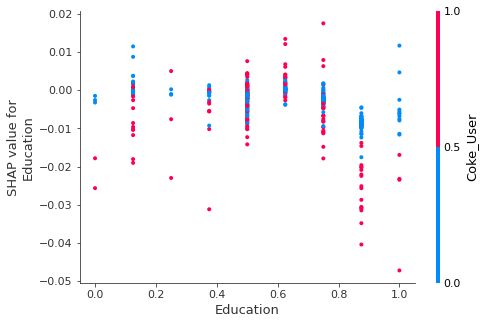

In [58]:
shap.dependence_plot('Education',shap_values[1],X_test_df)

### Using SHAP with SVMS: 

https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html**
- ~~Must run the SVC with `probability=True` to be able to use `.predict_proba`, which is needed for the `KernelExplainer`~~

[i] Training started at 05/19/21-17:34:45:
	Training time was 0.0710 seconds.

           Train  Test  Difference
accuracy   0.94  0.93        0.01 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       412
           1       0.72      0.80      0.76        60

    accuracy                           0.93       472
   macro avg       0.84      0.88      0.86       472
weighted avg       0.94      0.93      0.94       472



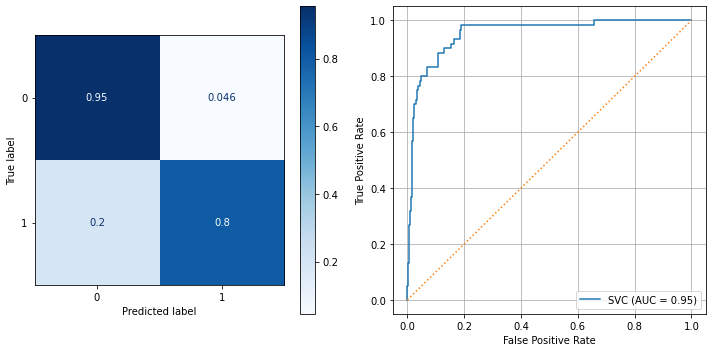

In [59]:
svc_linear = pf.fit_and_time_model(SVC(kernel='linear',C=1),#probability=True,
                                *train_test_list)

In [60]:
# pred_func = svc_linear.decision_function
X_shap = shap.sample(X_test_df,nsamples=200)
explainer = shap.KernelExplainer(svc_linear.predict,X_shap)
explainer

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [61]:
shap_values = explainer.shap_values(X_shap,nsamples=100)#, nsamples=1000)

In [62]:
shap_values.shape

(200, 40)

In [63]:
X_test_df.shape

(472, 40)

In [64]:
shap_values[0].shape

(40,)

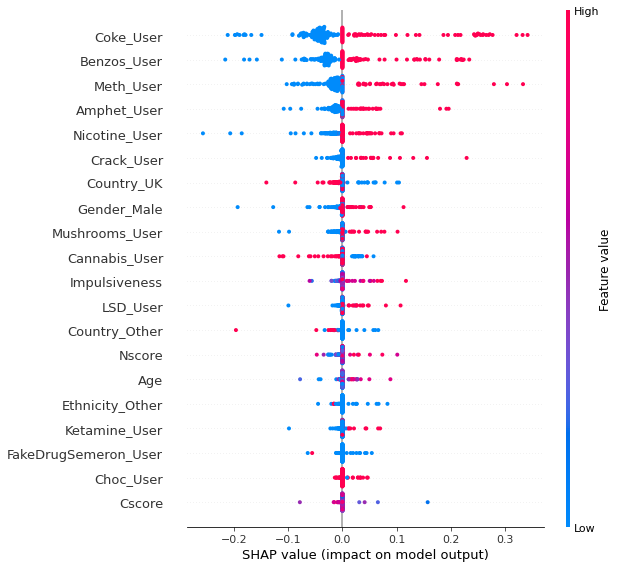

In [65]:
# # shap.force_plot(shap_values[0],X_test)
shap.summary_plot(shap_values,X_shap) 

In [66]:
# shap.summary_plot(shap_values,X_test,plot_type='bar')

## Explaining Models with LIME

>- LIME (Local Interpretable Model-Agnostic Explanations) 
    - GitHub: https://github.com/marcotcr/lime
    - [White Paper](https://arxiv.org/abs/1602.04938)

- [Blog Post:"ExplainYour Modelw ith LIME"](https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423)

In [67]:
# !pip install lime
from lime.lime_tabular import LimeTabularExplainer

In [68]:
lime_explainer =LimeTabularExplainer(
    training_data=np.array(X_test_df),
    feature_names=X_train_df.columns,
    class_names=['Non-User', 'Heroin-User'],
    mode='classification'
)

In [69]:
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")
# X_test_df.iloc[row].round(2)    

- Row #: 186
Class = Non-User


In [70]:
exp = lime_explainer.explain_instance(X_test_df.iloc[row], rf.predict_proba)
exp.show_in_notebook(show_table=True)

# Appendix

### Renaming Features

In [71]:
columns= {0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',
         6:'Nscore',7:'Escore',8:'Oscore',9:"Ascore",10:'Cscore',
         11:'Impulsiveness',12:'SS'}

drug_dict = {13:'Alcohol', 
              14: 'Amphet', 
              15: 'Amyl', 
              16: 'Benzos', 
              17: 'Caff', 
              18: 'Cannabis', 
              19: 'Choc', 
              20: 'Coke',
              21: 'Crack', 
              22: 'Ecstasy',
              23: 'Heroin', 
              24: 'Ketamine', 
              25: 'LegalH', 
              26: 'LSD',
              27: 'Meth',
              28: 'Mushrooms', 
              29: 'Nicotine', 
              30: "FakeDrugSemeron",
              31: 'VSA'}

all_columns = {**columns, **drug_dict}

drug_cols = list(drug_dict.values())
drug_cols

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'FakeDrugSemeron',
 'VSA']